In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('C:/Users/USER/Downloads/2. Dataset/data-full.csv')

In [3]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [5]:
df2=df.copy()


In [6]:
df2.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
df2.shape


(45211, 17)

In [8]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [9]:
df2.drop(['default'],axis=1, inplace=True)


In [10]:
df2.groupby(['y','pdays']).size()


y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [11]:
df2.drop(['pdays'],axis=1, inplace=True)

In [12]:
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [13]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [14]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [15]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [16]:
df3 = df2[df2['campaign'] < 33]
#เอาค่าที่มัน outliers ออก จำนวนผู้ติดต่อไม่น่าจะเกิน 33 คน

In [17]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             

In [18]:
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           33532
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [19]:
df4 = df3[df3['previous'] < 31]

In [20]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
# ทำเป็นตัวแปรดัมมี่

In [21]:
df4

age  balance housing loan  day  duration  campaign  previous    y  \
0       58     2143     yes   no    5       261         1         0   no   
1       44       29     yes   no    5       151         1         0   no   
2       33        2     yes  yes    5        76         1         0   no   
3       47     1506     yes   no    5        92         1         0   no   
4       33        1      no   no    5       198         1         0   no   
...    ...      ...     ...  ...  ...       ...       ...       ...  ...   
45206   51      825      no   no   17       977         3         0  yes   
45207   71     1729      no   no   17       456         2         0  yes   
45208   72     5715      no   no   17      1127         5         3  yes   
45209   57      668      no   no   17       508         4         0   no   
45210   37     2971      no   no   17       361         2        11   no   

       job_blue-collar  ...  month_jul  month_jun  month_mar  month_may  \
0                    0  ...          0          0          0          1   
1                    0  ...          0          0          0          1   
2                    0  ...          0          0          0          1   
3                    1  ...          0          0          0          1   
4                    0  ...          0          0          0          1   
...                ...  ...        ...        ...        ...        ...   
45206                0  ...          0          0          0          0   
45207                0  ...          0          0          0          0   
45208                0  ...          0          0          0          0   
45209                1  ...          0          0          0          0   
45210                0  ...          0          0          0          0   

       month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0              0          0          0               0                 0   
1              0          0          0               0                 0   
2              0          0          0               0                 0   
3              0          0          0               0                 0   
4              0          0          0               0                 0   
...          ...        ...        ...             ...               ...   
45206          1          0          0               0                 0   
45207          1          0          0               0                 0   
45208          1          0          0               0                 1   
45209          1          0          0               0                 0   
45210          1          0          0               1                 0   

       poutcome_unknown  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
45206                 1  
45207                 1  
45208                 0  
45209                 1  
45210                 0  

[45161 rows x 41 columns]

In [22]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [23]:
df4

age  balance  day  duration  campaign  previous  job_blue-collar  \
0       58     2143    5       261         1         0                0   
1       44       29    5       151         1         0                0   
2       33        2    5        76         1         0                0   
3       47     1506    5        92         1         0                1   
4       33        1    5       198         1         0                0   
...    ...      ...  ...       ...       ...       ...              ...   
45206   51      825   17       977         3         0                0   
45207   71     1729   17       456         2         0                0   
45208   72     5715   17      1127         5         3                0   
45209   57      668   17       508         4         0                1   
45210   37     2971   17       361         2        11                0   

       job_entrepreneur  job_housemaid  job_management  ...  month_may  \
0                     0              0               1  ...          1   
1                     0              0               0  ...          1   
2                     1              0               0  ...          1   
3                     0              0               0  ...          1   
4                     0              0               0  ...          1   
...                 ...            ...             ...  ...        ...   
45206                 0              0               0  ...          0   
45207                 0              0               0  ...          0   
45208                 0              0               0  ...          0   
45209                 0              0               0  ...          0   
45210                 1              0               0  ...          0   

       month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0              0          0          0               0                 0   
1              0          0          0               0                 0   
2              0          0          0               0                 0   
3              0          0          0               0                 0   
4              0          0          0               0                 0   
...          ...        ...        ...             ...               ...   
45206          1          0          0               0                 0   
45207          1          0          0               0                 0   
45208          1          0          0               0                 1   
45209          1          0          0               0                 0   
45210          1          0          0               1                 0   

       poutcome_unknown  housing_new  loan_new  y_new  
0                     1            1         0      0  
1                     1            1         0      0  
2                     1            1         1      0  
3                     1            1         0      0  
4                     1            0         0      0  
...                 ...          ...       ...    ...  
45206                 1            0         0      1  
45207                 1            0         0      1  
45208                 0            0         0      1  
45209                 1            0         0      0  
45210                 0            0         0      0  

[45161 rows x 41 columns]

In [24]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [28]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# เลือกโมเดล

In [29]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90907833 0.9043731  0.90257404 0.90698962 0.90588235]
0.9057794871843985


In [30]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90935511 0.90921672 0.90077498 0.90768166 0.90698962]
0.9068036166974889


In [31]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [32]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

In [33]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8850557379560058,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 100}},
 {'model': 'XGBClassifier',
  'best_score': 0.8829299629338621,
  'best_params': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}}]

In [34]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)


In [35]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [36]:
model_rf.score(X_test,y_test)

0.8964906454112698

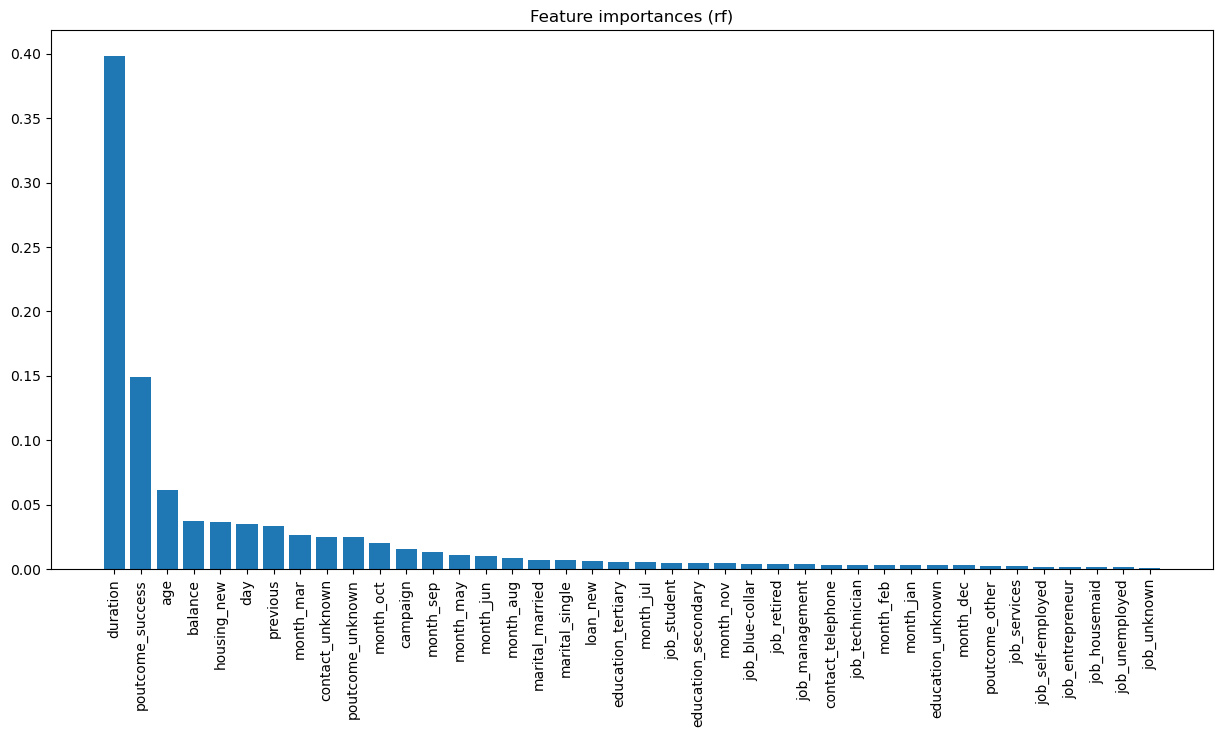

In [37]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rf_feature_importances))
plt.bar(x_pos, rf_feature_importances['score'])
plt.xticks(x_pos, rf_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (rf)')

plt.show()

In [135]:
X2 = df4.drop(['poutcome_success'],axis=1)
y2 = df4['poutcome_success']
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=0)

In [136]:
from sklearn.ensemble import RandomForestClassifier

model_rf2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)

In [137]:
model_rf.fit(X2_train,y2_train)

RandomForestClassifier(max_depth=10)

In [139]:
model_rf.score(X2_test,y2_test)

0.973430753902358

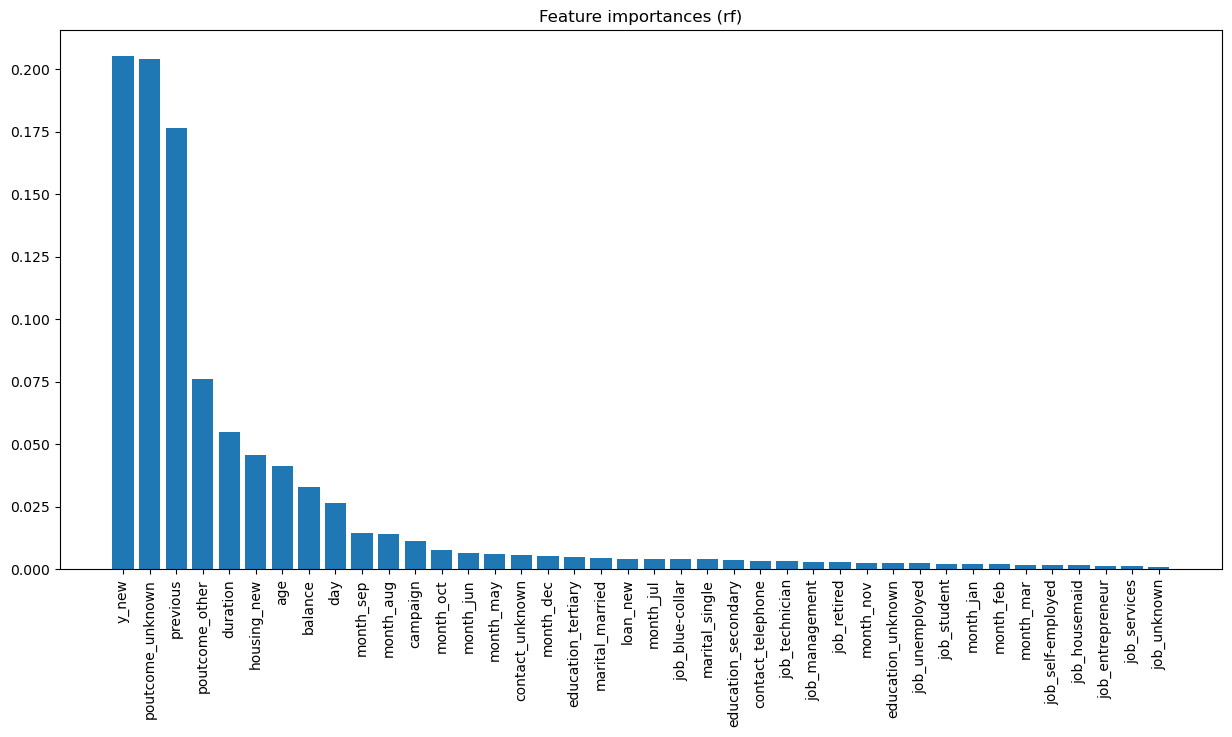

In [140]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X2_train.columns, model_rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rf_feature_importances))
plt.bar(x_pos, rf_feature_importances['score'])
plt.xticks(x_pos, rf_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (rf)')

plt.show()

In [207]:
# คำนวณค่าสหสัมพันธ์ระหว่าง "duration" และคอลัมอื่น
correlation_poutcome_success = df4.corr()['poutcome_success']

# แสดงผลสหสัมพันธ์
#print(correlation_poutcome_success)

correlation_poutcome_success_sorted = correlation_poutcome_success.sort_values(ascending=False)
print(correlation_poutcome_success_sorted)

poutcome_success       1.000000
y_new                  0.306818
previous               0.260765
month_sep              0.123414
month_oct              0.103246
month_dec              0.078849
job_retired            0.055471
month_mar              0.053046
job_student            0.048073
education_tertiary     0.047947
duration               0.042287
age                    0.035482
balance                0.035219
month_feb              0.028513
marital_single         0.026177
job_management         0.021504
job_unemployed         0.015040
month_jan              0.012190
education_unknown      0.011819
contact_telephone      0.008543
month_nov              0.003568
job_unknown            0.002166
job_self-employed      0.001477
month_aug             -0.000670
job_technician        -0.002935
job_housemaid         -0.009388
marital_married       -0.018512
job_entrepreneur      -0.019133
job_services          -0.022966
month_jun             -0.023080
education_secondary   -0.024756
day     

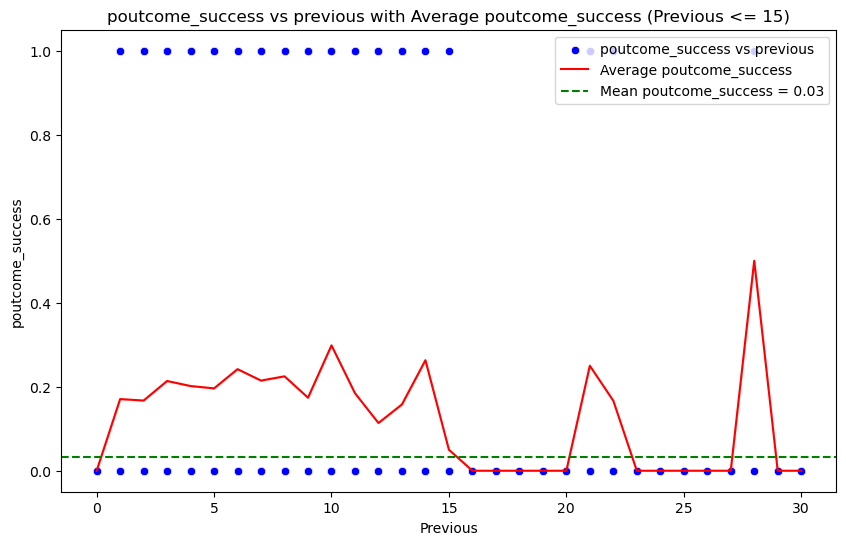

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# กรองข้อมูล previous ที่ไม่เกิน 15
df4_filtered = df4[df4['previous'] <= 30]

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# ใช้ seaborn เพื่อสร้าง scatter plot ของ "previous" และ "poutcome_success" และเพิ่มเส้นค่าเฉลี่ย
sns.scatterplot(data=df4_filtered, x='previous', y='poutcome_success', color='blue', label='poutcome_success vs previous')
sns.lineplot(x=df4_filtered['previous'], y=df4_filtered.groupby('previous')['poutcome_success'].transform('mean'), color='red', label='Average poutcome_success')

# หาค่าเฉลี่ยของ poutcome_success สำหรับ previous
mean_poutcome_success = df4['poutcome_success'].mean()
plt.axhline(mean_poutcome_success, color='green', linestyle='dashed', label=f'Mean poutcome_success = {mean_poutcome_success:.2f}')

plt.xlabel('Previous')
plt.ylabel('poutcome_success')
plt.title('poutcome_success vs previous with Average poutcome_success (Previous <= 15)')
plt.legend(loc='upper right')

plt.show()


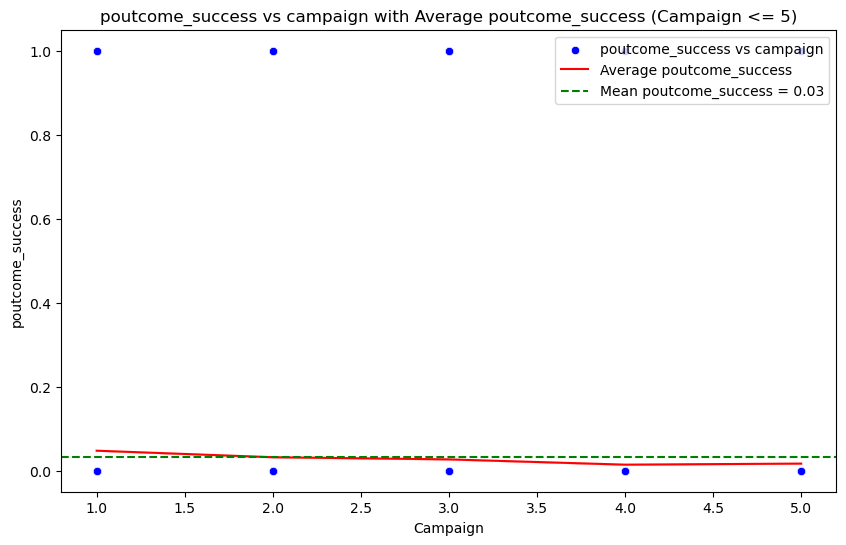

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# กรองข้อมูล campaign ที่ไม่เกิน 15
df4_filtered = df4[df4['campaign'] <= 5]

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# ใช้ seaborn เพื่อสร้าง scatter plot ของ "campaign" และ "poutcome_success" และเพิ่มเส้นค่าเฉลี่ย
sns.scatterplot(data=df4_filtered, x='campaign', y='poutcome_success', color='blue', label='poutcome_success vs campaign')
sns.lineplot(x=df4_filtered['campaign'], y=df4_filtered.groupby('campaign')['poutcome_success'].transform('mean'), color='red', label='Average poutcome_success')

# หาค่าเฉลี่ยของ poutcome_success สำหรับ campaign
mean_poutcome_success = df4['poutcome_success'].mean()
plt.axhline(mean_poutcome_success, color='green', linestyle='dashed', label=f'Mean poutcome_success = {mean_poutcome_success:.2f}')

plt.xlabel('Campaign')
plt.ylabel('poutcome_success')
plt.title('poutcome_success vs campaign with Average poutcome_success (Campaign <= 5)')
plt.legend(loc='upper right')

plt.show()


In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_rf.predict(X_test))
cm

array([[7877,   73],
       [ 862,  221]], dtype=int64)

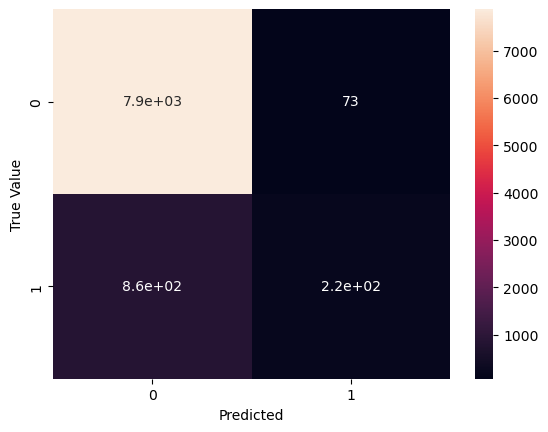

In [39]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [103]:
yes_data = df[df['y'] == 'yes']
no_data = df[df['y'] == 'no']

In [114]:
import pandas as pd

# สร้าง DataFrame ที่มีคอลัมที่สนใจและคอลัม y
data = df4[['duration', 'poutcome_success', 'age', 'balance', 'housing_new', 'y_new']]

# สร้าง correlation matrix
correlation_matrix = data.corr()

# แสดง correlation matrix
print(correlation_matrix)

                  duration  poutcome_success       age   balance  housing_new  \
duration          1.000000          0.042287 -0.004804  0.021380     0.005200   
poutcome_success  0.042287          1.000000  0.035482  0.035219    -0.091350   
age              -0.004804          0.035482  1.000000  0.097732    -0.185507   
balance           0.021380          0.035219  0.097732  1.000000    -0.068736   
housing_new       0.005200         -0.091350 -0.185507 -0.068736     1.000000   
y_new             0.394460          0.306818  0.025049  0.052832    -0.139284   

                     y_new  
duration          0.394460  
poutcome_success  0.306818  
age               0.025049  
balance           0.052832  
housing_new      -0.139284  
y_new             1.000000  


In [120]:
df4

age  balance  day  duration  campaign  previous  job_blue-collar  \
0       58     2143    5       261         1         0                0   
1       44       29    5       151         1         0                0   
2       33        2    5        76         1         0                0   
3       47     1506    5        92         1         0                1   
4       33        1    5       198         1         0                0   
...    ...      ...  ...       ...       ...       ...              ...   
45206   51      825   17       977         3         0                0   
45207   71     1729   17       456         2         0                0   
45208   72     5715   17      1127         5         3                0   
45209   57      668   17       508         4         0                1   
45210   37     2971   17       361         2        11                0   

       job_entrepreneur  job_housemaid  job_management  ...  month_may  \
0                     0              0               1  ...          1   
1                     0              0               0  ...          1   
2                     1              0               0  ...          1   
3                     0              0               0  ...          1   
4                     0              0               0  ...          1   
...                 ...            ...             ...  ...        ...   
45206                 0              0               0  ...          0   
45207                 0              0               0  ...          0   
45208                 0              0               0  ...          0   
45209                 0              0               0  ...          0   
45210                 1              0               0  ...          0   

       month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0              0          0          0               0                 0   
1              0          0          0               0                 0   
2              0          0          0               0                 0   
3              0          0          0               0                 0   
4              0          0          0               0                 0   
...          ...        ...        ...             ...               ...   
45206          1          0          0               0                 0   
45207          1          0          0               0                 0   
45208          1          0          0               0                 1   
45209          1          0          0               0                 0   
45210          1          0          0               1                 0   

       poutcome_unknown  housing_new  loan_new  y_new  
0                     1            1         0      0  
1                     1            1         0      0  
2                     1            1         1      0  
3                     1            1         0      0  
4                     1            0         0      0  
...                 ...          ...       ...    ...  
45206                 1            0         0      1  
45207                 1            0         0      1  
45208                 0            0         0      1  
45209                 1            0         0      0  
45210                 0            0         0      0  

[45161 rows x 41 columns]

<Axes: >

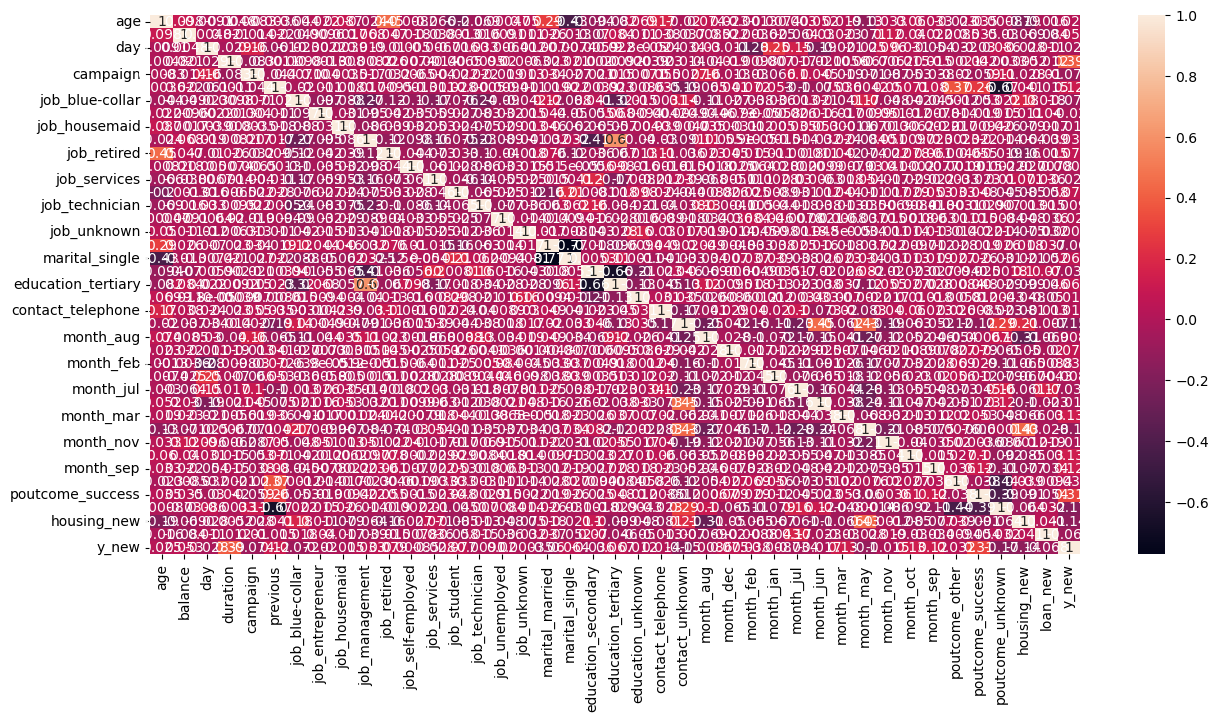

In [117]:
## Checking for correlation
cor_mat=df4.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.10350935458873022


In [127]:
y_pred_new = model_rf.predict(X)
y_pred_new

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

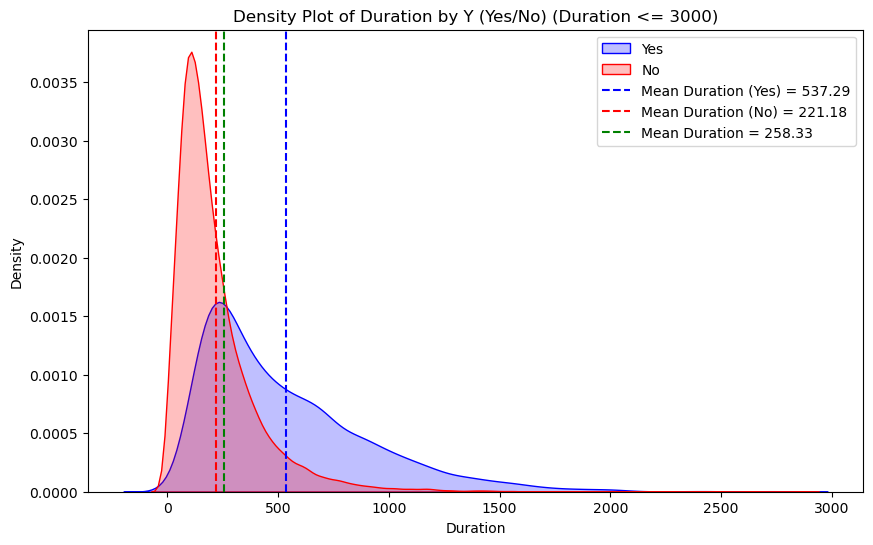

max Yes = 3881 max No = 4918


In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# กรองข้อมูล duration ที่ไม่เกิน 3000
yes_data_filtered = yes_data[yes_data['duration'] <= 3000]
no_data_filtered = no_data[no_data['duration'] <= 3000]

max_yes_duration = yes_data['duration'].max()
max_no_duration = no_data['duration'].max()

# ใช้ KDE plot สร้างกราฟความหนาแน่น
sns.kdeplot(yes_data_filtered['duration'], color='blue', label='Yes', fill=True)
sns.kdeplot(no_data_filtered['duration'], color='red', label='No', fill=True)

# หาค่าเฉลี่ยของ Duration สำหรับ y = yes และ no
mean_duration_yes = yes_data['duration'].mean()
mean_duration_no = no_data['duration'].mean()
mean_duration = df4['duration'].mean()

plt.axvline(mean_duration_yes, color='blue', linestyle='dashed', label=f'Mean Duration (Yes) = {mean_duration_yes:.2f}')
plt.axvline(mean_duration_no, color='red', linestyle='dashed', label=f'Mean Duration (No) = {mean_duration_no:.2f}')
plt.axvline(mean_duration, color='green', linestyle='dashed', label=f'Mean Duration = {mean_duration:.2f}')

plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Density Plot of Duration by Y (Yes/No) (Duration <= 3000)')
plt.legend(loc='upper right')

plt.show()
print("max Yes =" ,max_yes_duration,"max No =", max_no_duration)

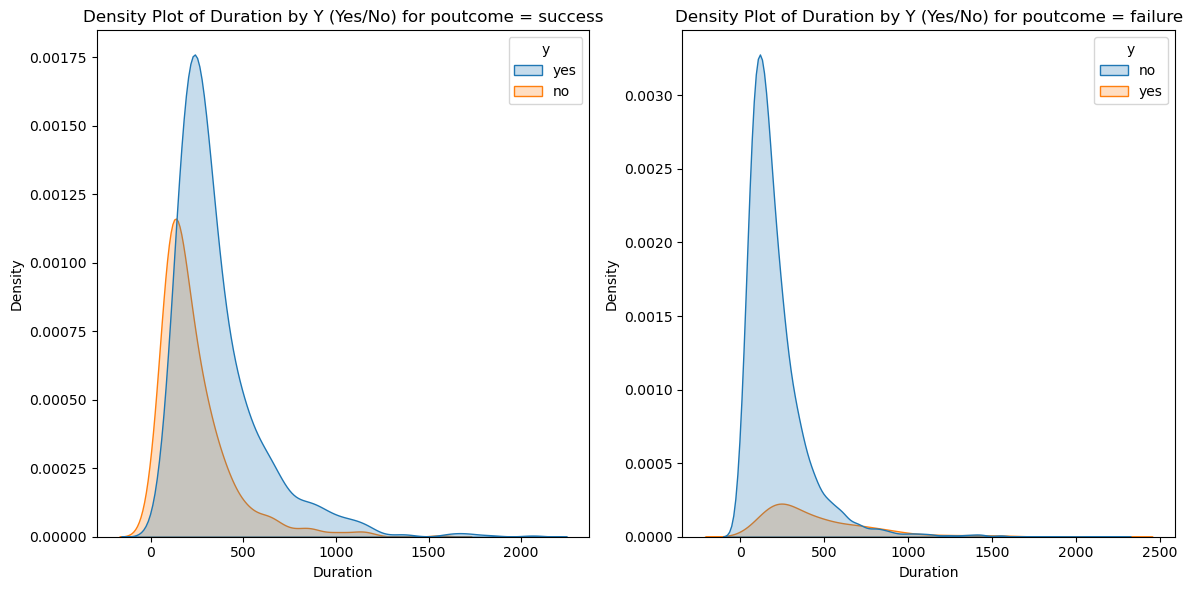

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# กรองข้อมูลที่ poutcome เท่ากับ 'success' หรือ 'failure'
success_data = df[df['poutcome'] == 'success']
failure_data = df[df['poutcome'] == 'failure']

# สร้างกราฟ
plt.figure(figsize=(12, 6))

# ใช้ KDE plot สร้างกราฟความหนาแน่นสำหรับ y = yes และ y = no โดยแยกกราฟออกเป็น 2 ส่วน



# กราฟสำหรับ poutcome = success
plt.subplot(1, 2, 1)
sns.kdeplot(data=success_data, x='duration', hue='y', fill=True)
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Density Plot of Duration by Y (Yes/No) for poutcome = success')

# กราฟสำหรับ poutcome = failure
plt.subplot(1, 2, 2)
sns.kdeplot(data=failure_data, x='duration', hue='y', fill=True)
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Density Plot of Duration by Y (Yes/No) for poutcome = failure')

plt.tight_layout()
plt.show()


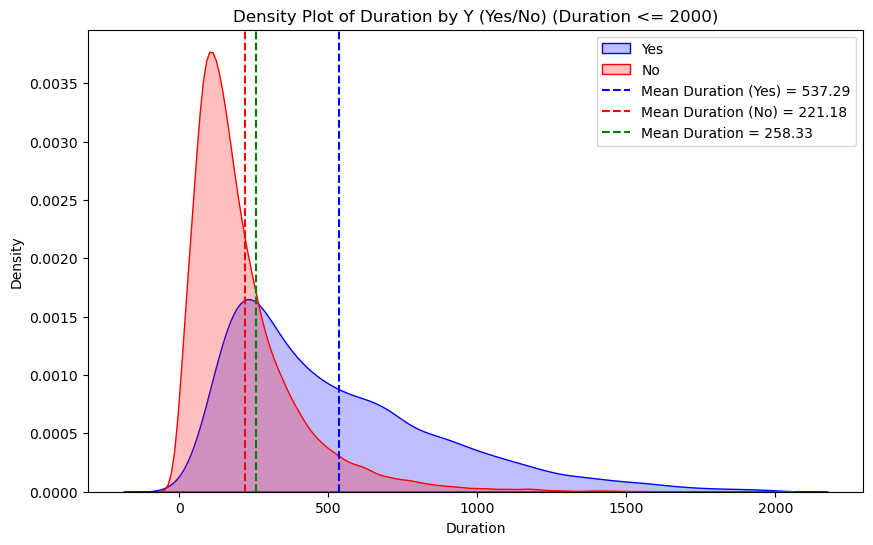

max Yes = 3881 max No = 4918


In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# กรองข้อมูล duration ที่ไม่เกิน 3000
yes_data_filtered = yes_data[yes_data['duration'] <= 2000]
no_data_filtered = no_data[no_data['duration'] <= 2000]

max_yes_duration = yes_data['duration'].max()
max_no_duration = no_data['duration'].max()

# ใช้ KDE plot สร้างกราฟความหนาแน่น
sns.kdeplot(yes_data_filtered['duration'], color='blue', label='Yes', fill=True)
sns.kdeplot(no_data_filtered['duration'], color='red', label='No', fill=True)


# หาค่าเฉลี่ยของ Duration สำหรับ y = yes และ no
mean_duration_yes = yes_data['duration'].mean()
mean_duration_no = no_data['duration'].mean()
mean_duration = df4['duration'].mean()

plt.axvline(mean_duration_yes, color='blue', linestyle='dashed', label=f'Mean Duration (Yes) = {mean_duration_yes:.2f}')
plt.axvline(mean_duration_no, color='red', linestyle='dashed', label=f'Mean Duration (No) = {mean_duration_no:.2f}')
plt.axvline(mean_duration, color='green', linestyle='dashed', label=f'Mean Duration = {mean_duration:.2f}')

plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Density Plot of Duration by Y (Yes/No) (Duration <= 2000)')
plt.legend(loc='upper right')




plt.show()
print("max Yes =" ,max_yes_duration,"max No =", max_no_duration)

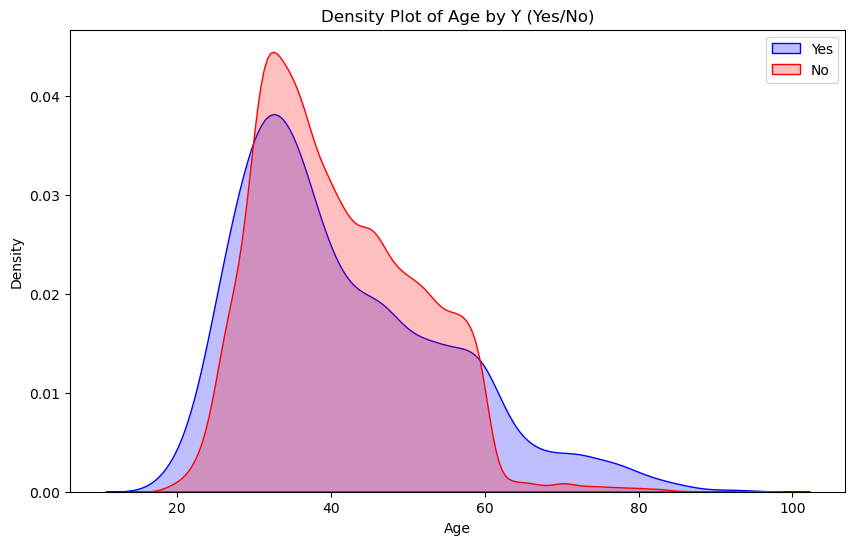

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# ใช้ KDE plot สร้างกราฟความหนาแน่น
sns.kdeplot(yes_data_filtered['age'], color='blue', label='Yes', fill=True)
sns.kdeplot(no_data_filtered['age'], color='red', label='No', fill=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age by Y (Yes/No)')
plt.legend(loc='upper right')

plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_2624\2887481759.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




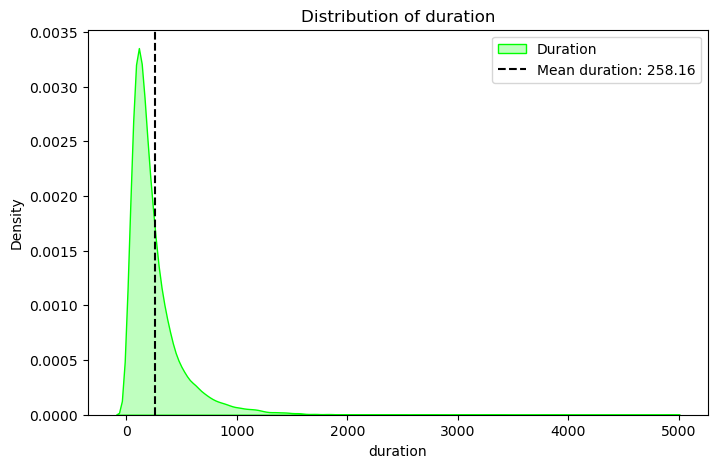

In [76]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'],color='Lime',shade=True,label='Duration')
plt.axvline(x=df['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

In [119]:
mean_duration_yes = df[df['y'] == 'yes']['duration'].mean()
mean_duration_no = df[df['y'] == 'no']['duration'].mean()

median_duration_yes = df[df['y'] == 'yes']['duration'].median()
median_duration_no = df[df['y'] == 'no']['duration'].median()

print(f"Mean Duration for 'yes': {mean_duration_yes}")
print(f"Mean Duration for 'no': {mean_duration_no}")
print(f"Median Duration for 'yes': {median_duration_yes}")
print(f"Median Duration for 'no': {median_duration_no}")

Mean Duration for 'yes': 537.2945736434109
Mean Duration for 'no': 221.18280647262162
Median Duration for 'yes': 426.0
Median Duration for 'no': 164.0


In [200]:
import plotly.express as px

# หาค่ามัธยฐานของ duration สำหรับ y = yes และ no
median_duration_yes = df[df['y'] == 'yes']['duration'].median()
median_duration_no = df[df['y'] == 'no']['duration'].median()

# สร้างกราฟ Box Plot
fig = px.box(df, x='y', y='duration', color='y', template='simple_white', color_discrete_sequence=['YellowGreen', 'LightCoral'], 
             title='<b>Effect of Duration on Term Deposit Status')
fig.update_layout(title_x=0.5, font_family="Times New Roman", legend_title_text="<b>Term Deposit")

# เพิ่มเส้นตัดแกน y ที่แสดงค่ามัธยฐาน
fig.add_shape(type='line', x0='yes', x1='no', y0=median_duration_yes, y1=median_duration_no,
              line=dict(color='black', width=2, dash='dash'))
fig.add_annotation(x='no', y=median_duration_no, text=f'Median: {median_duration_no}', showarrow=True, arrowhead=2, font=dict(size=24))
fig.add_annotation(x='yes', y=median_duration_yes, text=f'Median: {median_duration_yes}', showarrow=True, arrowhead=2, font=dict(size=24))

fig.show()


In [201]:
correlation_duration = df4.corr()['duration']

# แสดงผลสหสัมพันธ์
print(correlation_duration)

age                   -0.004804
balance                0.021380
day                   -0.029449
duration               1.000000
campaign              -0.083075
previous               0.001122
job_blue-collar        0.009778
job_entrepreneur      -0.001335
job_housemaid         -0.008040
job_management        -0.008173
job_retired            0.025980
job_self-employed      0.007356
job_services           0.001389
job_student           -0.006546
job_technician        -0.009492
job_unemployed         0.020333
job_unknown           -0.006261
marital_married       -0.022852
marital_single         0.020603
education_secondary    0.001953
education_tertiary     0.000923
education_unknown     -0.000392
contact_telephone     -0.023030
contact_unknown       -0.014470
month_aug             -0.040210
month_dec              0.019192
month_feb             -0.009763
month_jan              0.006954
month_jul              0.017044
month_jun             -0.021331
month_mar             -0.005590
month_ma

In [202]:
correlation_duration_sorted = correlation_duration.sort_values(ascending=False)
print(correlation_duration_sorted)


duration               1.000000
y_new                  0.394460
poutcome_success       0.042287
job_retired            0.025980
balance                0.021380
marital_single         0.020603
job_unemployed         0.020333
month_dec              0.019192
month_jul              0.017044
month_sep              0.015201
month_oct              0.014998
job_blue-collar        0.009778
job_self-employed      0.007356
month_jan              0.006954
month_may              0.006739
housing_new            0.005200
education_secondary    0.001953
job_services           0.001389
previous               0.001122
education_tertiary     0.000923
education_unknown     -0.000392
job_entrepreneur      -0.001335
poutcome_other        -0.002108
poutcome_unknown      -0.003316
age                   -0.004804
month_mar             -0.005590
month_nov             -0.006179
job_unknown           -0.006261
job_student           -0.006546
job_housemaid         -0.008040
job_management        -0.008173
job_tech

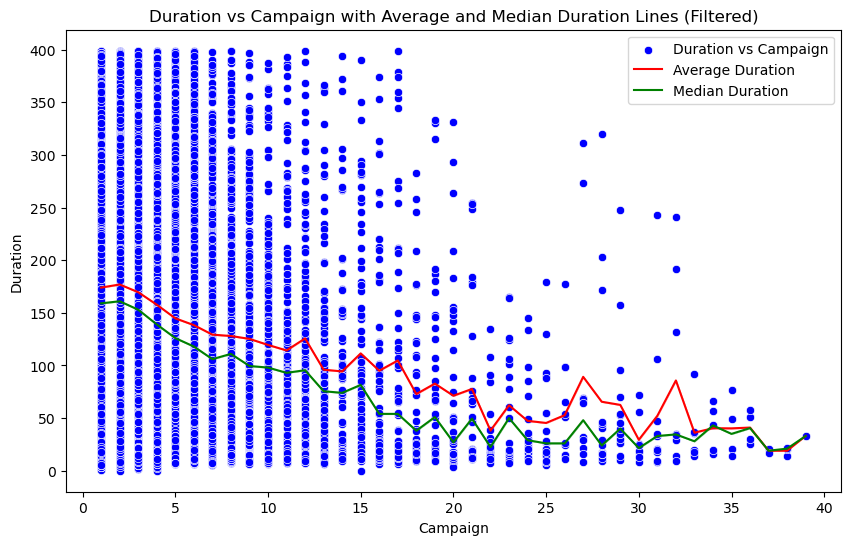

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# กรองข้อมูล campaign น้อยกว่า 40 และ duration น้อยกว่า 1000
filtered_data = df[(df['campaign'] < 40) & (df['duration'] < 400)]

# ใช้ seaborn เพื่อสร้าง scatter plot ของ "campaign" และ "duration" และเพิ่มเส้นค่าเฉลี่ย
sns.scatterplot(data=filtered_data, x='campaign', y='duration', color='blue', label='Duration vs Campaign')
sns.lineplot(x=filtered_data['campaign'], y=filtered_data.groupby('campaign')['duration'].transform('mean'), color='red', label='Average Duration')
sns.lineplot(x=filtered_data['campaign'], y=filtered_data.groupby('campaign')['duration'].transform('median'), color='green', label='Median Duration')

plt.xlabel('Campaign')
plt.ylabel('Duration')
plt.title('Duration vs Campaign with Average and Median Duration Lines (Filtered)')
plt.legend(loc='upper right')

plt.show()


In [116]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()
mean_duration = df['duration'].mean()
mean_duration

258.1630797814691

In [79]:
import plotly.express as px

fig=px.bar(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),x='Poutcome',y='Count',color='Poutcome',text='Count',color_discrete_sequence=['grey','red','green','blue'],template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()
fig=px.pie(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),names='Poutcome',values='Count',hole=0.5,template='simple_white',color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

In [80]:
a=df.groupby(['poutcome','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percentile']=round(a['Count']*100/a.groupby('poutcome')['Count'].transform('sum'),1)
a['percentile']=a['percentile'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='poutcome',y='Count',color='y',text='percentile',template='simple_white',barmode='group',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.08,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Outcome of Previous Marketing Campaign<br><b style="font-family: Times New Roman; font-size:1.0vw">% of term deposits opened based on the outcome of previous campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

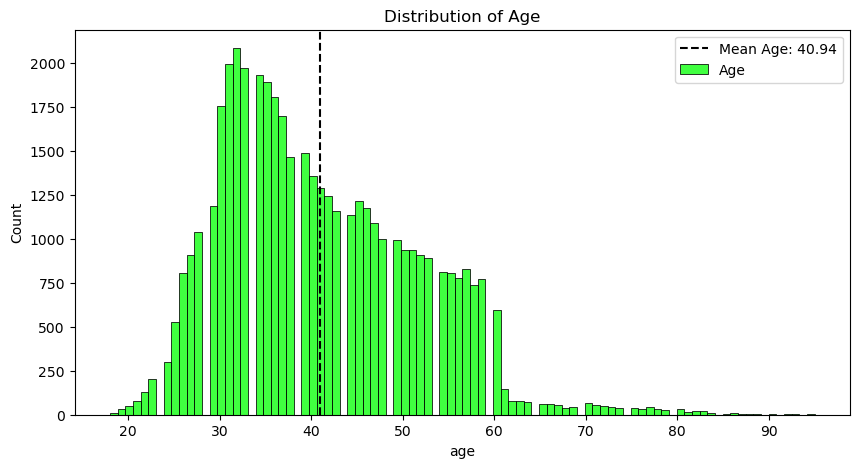

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],color='Lime',label='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()

In [85]:
fig=px.box(df,x='y',y='age',color='y',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [84]:
fig=px.line(df.groupby(['age','y'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='y',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Term Deposits')
fig.add_annotation(
  x=55,  # arrows' head
  y=165,  # arrows' head
  ax=60,  # arrows' tail
  ay=200,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  #text='Even <b style="color: Brown;">mid-age group</b> clients <b style="color: green;">subscribed</b> more for the term deposits,<br>     there is a more domination of clients from this group who are <br><b style="color: red;">not subscribed</b> for the <b style="color: Indigo;">term deposits</b>.',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.add_annotation(
  x=75,  # arrows' head
  y=30,  # arrows' head
  ax=80,  # arrows' tail
  ay=65,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  #text='<b style="color: Brown;">old age group</b> clients are <b style="color: Green;">subscribing</b> the <b style="color: Indigo;">term deposits</b> more<br> and count of <b style="color: red;">not subscribing</b> to the deposits is <b style="color: Green;">less</b>.',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.show()

In [98]:
df['Balance']=df['balance'].apply(lambda x: 'Above_Average' if x>=df['balance'].mean() else 'Below_Average')
a=df.groupby(['Balance','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Balance')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Balance',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Balance on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average balance and below average balance</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

In [99]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

k=df.groupby(['housing','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['housing']=='yes']['Count'],labels=k[k['housing']=='yes']['y'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Housing Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['housing']=='no']['Count'],labels=k[k['housing']=='no']['y'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Housing loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>y",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Housing Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')

In [100]:
fig=px.line(df.groupby(['age','housing'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='housing',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Housing Loan')
fig.show()

In [101]:
a=df.groupby(['month','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('month')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='month',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits based on last Contact month',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

In [215]:
# Executive Summary
# 1.เพื่อเพิ่ม conversion rate ควรที่จะติดต่อลูกค้าที่ยังไม่เปิดบัญชีฝากประจำไปใหม่อีกรอบโดยไม่ติดต่อในเดือนสิงหาคม 
# โดยที่ผู้ติดต่อกับลูกค้าควรมี 2 คนหรือไม่เกิน 3 คน และเริ่มจากคนที่อาชีพ retired ก่อน และคนที่มี balance สูงก่อน 
# และคนที่ poutcome=success ก่อน จากนั้นติดต่อให้ได้ในระยะเวลาเกิน 258 วินาที ถึง 540 วินาทีโดยเฉลี่ยในแต่ละคน
# 2.เพื่อเพิ่ม sales volume ควรที่จะคุยกับลูกค้าให้ใน 100-300 วินาทีแรกทำให้สนใจที่สุด และคุยให้ได้นานเกิน 260 วินาทีจนถึง 540 วินาทีโดยเฉลี่ยในแต่ละคน
# 3.เพื่อเพิ่ม sales volume ไม่ควรติดต่อในเดือน May แต่ควรติดต่อในเดือน Sep, Oct, Dec, Mar ตามลำดับ และติดต่อคนที่อีพ retired ก่อน 
# โดยหลีกเลี่ยงคนที่มีสินเชื่อทั้งแบบส่วนตัวและแบบที่อยู่อาศัยก่อน และเลี่ยงคนที่ไม่รู้ contact และให้ คนที่ติดต่อกับลูกค้าในแคมเปจไม่เกิน 3 คน
# และเลือกคนที่ previous อยู่ระหว่าง 3-10 